# Import Statements

### I linked the google sheet to this notebook using this source: https://towardsdatascience.com/from-google-sheet-to-your-jupyter-notebook-ccdbf28fbf1b. Any updates to the google sheet will be reflected automatically in this notebook

In [954]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import datetime

In [955]:
#Importing the module
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

# Link to Google Sheets

Connect the Google Sheets API

In [956]:
#The scope is always look like this so we did not need to change anything
scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

#Name of our Service Account Key
google_key_file = 'jupyter-spring2020ctc-connect-3bde2ba97cd1.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)

# Spring 2020 Data Cleaning

Open and save the "Spring 2020 CTC Recording" Google Sheets document, specifically the "Data-Analysis" sheet

In [957]:
#Opening the worksheet by using Worksheet ID
spring20_spreadsheet_key = '1OiGBYsa9eK26lAaznmiiczgSX17GHlOWoS0crNza-vo'
spring20_workbook = gc.open_by_key(spring20_spreadsheet_key)

#Selecting which sheet to pulling the data
spring20_sheet = spring20_workbook.worksheet('Data-Analysis')

#Pulling the data and transform it to the data frame
spring20_values = spring20_sheet.get_all_values()
spring20 = pd.DataFrame(spring20_values[1:], columns = spring20_values[0])

Open the dataframe

In [958]:
spring20.head()

,CURRENT STANDINGS BELOW,360,68,80,89,58.5,64.5,0,0,0,0,0,0,0
0,Fraternity,Current Total,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,0,,,,,,,,,,,,
2,Sigma Pi,0,,,,,,,,,,,,
3,SAE,4,,,,,4,,,,,,,
4,Elmo,0,,,,,,,,,,,,


Fill blank cells with NA's

In [959]:
spring20.replace(r'', np.NaN, inplace=True)
spring20.head()

,CURRENT STANDINGS BELOW,360,68,80,89,58.5,64.5,0,0,0,0,0,0,0
0,Fraternity,Current Total,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace the header with the second row of the dataframe

In [960]:
new_header = spring20.iloc[0] # grab the first row for the header
spring20 = spring20[1:] # take the data less the header row
spring20.columns = new_header # set the header row as the spring20 header
spring20.head()

,Fraternity,Current Total,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,22,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop "Current Total" column- we will not be needing this

In [961]:
spring20.columns
spring20.drop(columns=['Current Total'], inplace=True) # drop irrelevant column
spring20.head()

,Fraternity,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete scrap notes at the bottom of the sheet

In [962]:
spring20 = spring20.iloc[0:44,] # keep only relevant rows

Fill NA's in "Fraternity" column using the forward fill method as appropriate

In [963]:
spring20['Fraternity'].fillna(method='ffill', inplace=True) # forward fill NA values for Fraternity name 
spring20.head()

,Fraternity,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Elmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Elmo,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete rows with empty weekly bags data (duplicate rows of each house caused by formats of the google sheet)

In [964]:
spring20 = spring20[~spring20['Fraternity'].duplicated(keep=False) |
                    spring20[spring20.columns[1:]].notnull().any(axis=1)]
spring20.head()

,Fraternity,Week 1 (2/3),Week 2 (2/10),Week 3 (2/17),Week 4 (2/14),Week 5 (3/2),SPR. BREAK(3/9),SPR. BREAK (3/16),Week 6 (3/23),Week 7 (3/30),Week 8 (4/6),Week 9 (4/13),Week 10 (4/20)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Elmo,NaN,3,2,3.5,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Delta Sig,NaN,NaN,3.5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tidy the dataframe by melting the week columns into a better format

In [965]:
spring20 = pd.melt(spring20, id_vars=['Fraternity'], value_vars=spring20.columns[1:])
spring20.columns=['Fraternity', 'Week', 'Bags']
spring20.head()

,Fraternity,Week,Bags
0,Chi Phi,Week 1 (2/3),NaN
1,Sigma Pi,Week 1 (2/3),NaN
2,SAE,Week 1 (2/3),NaN
3,Elmo,Week 1 (2/3),NaN
4,Delta Sig,Week 1 (2/3),NaN


Convert "Week" column into standard date-time string, and convert to date-time type

In [966]:
spring20['Week'] = spring20['Week'].apply(lambda x: x[x.find('(')+1:-1] + '/20')
spring20['Week']= pd.to_datetime(spring20['Week'].astype(str), format='%m/%d/%y')
spring20.head()

,Fraternity,Week,Bags
0,Chi Phi,2020-02-03,NaN
1,Sigma Pi,2020-02-03,NaN
2,SAE,2020-02-03,NaN
3,Elmo,2020-02-03,NaN
4,Delta Sig,2020-02-03,NaN


Fill NaN with 0's and convert "Bags" column to float type.

In [967]:
spring20.fillna(0, inplace=True)
spring20['Bags'] = pd.to_numeric(spring20['Bags'])
spring20.head()

,Fraternity,Week,Bags
0,Chi Phi,2020-02-03,0.0
1,Sigma Pi,2020-02-03,0.0
2,SAE,2020-02-03,0.0
3,Elmo,2020-02-03,0.0
4,Delta Sig,2020-02-03,0.0


Add "Spring 2020" label. Enjoy clean and tidy data!

In [968]:
spring20['Semester'] = 'Spring 2020'
spring20.head()

,Fraternity,Week,Bags,Semester
0,Chi Phi,2020-02-03,0.0,Spring 2020
1,Sigma Pi,2020-02-03,0.0,Spring 2020
2,SAE,2020-02-03,0.0,Spring 2020
3,Elmo,2020-02-03,0.0,Spring 2020
4,Delta Sig,2020-02-03,0.0,Spring 2020


# Fall 2019 Data Cleaning

Open and save the "Fall 2019 CTC Recording" Google Sheets document, specifically the "Data-Analysis" sheet

In [969]:
#Opening the worksheet by using Worksheet ID
fall19_spreadsheet_key = '14BYq15BfBUclNLbO8IRSAQeG98qCGDG3n59Hkfh3huU'
fall19_workbook = gc.open_by_key(fall19_spreadsheet_key)

#Selecting which sheet to pulling the data
fall19_sheet = fall19_workbook.worksheet('Data-Analysis')

#Pulling the data and transform it to the data frame
fall19_values = fall19_sheet.get_all_values()
fall19 = pd.DataFrame(fall19_values[1:], columns = fall19_values[0])

Open the dataframe

In [970]:
fall19.head()

,CURRENT STANDINGS BELOW,550.5,32,47.5,38.5,25,56.5,107.5,24.5,72,77,40.5,29.5
0,Fraternity,Current Total,Week 1 (9/8),Week 2 (9/15),Week 3 (9/22),Week 4 (9/29),Week 5 (10/13),Week 6 (10/20),Week 7 (10/27),Week 8 (11/3),Week 9 (11/10),Week 10 (11/17),Week 11 (11/24)
1,Chi Phi,0,,,,,,,,,,,
2,Sigma Pi,0,,,,,,,,,,,
3,SAE,9,,,,,,9,,,,,
4,,0,,,,,,,,,,,


Fill blank cells with NA's

In [971]:
fall19.replace(r'', np.NaN, inplace=True)
fall19.head()

,CURRENT STANDINGS BELOW,550.5,32,47.5,38.5,25,56.5,107.5,24.5,72,77,40.5,29.5
0,Fraternity,Current Total,Week 1 (9/8),Week 2 (9/15),Week 3 (9/22),Week 4 (9/29),Week 5 (10/13),Week 6 (10/20),Week 7 (10/27),Week 8 (11/3),Week 9 (11/10),Week 10 (11/17),Week 11 (11/24)
1,Chi Phi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,9,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace the header with the second row of the dataframe

In [972]:
new_header = fall19.iloc[0] # grab the first row for the header
fall19 = fall19[1:] # take the data less the header row
fall19.columns = new_header # set the header row as the spring20 header
fall19.head()

,Fraternity,Current Total,Week 1 (9/8),Week 2 (9/15),Week 3 (9/22),Week 4 (9/29),Week 5 (10/13),Week 6 (10/20),Week 7 (10/27),Week 8 (11/3),Week 9 (11/10),Week 10 (11/17),Week 11 (11/24)
1,Chi Phi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,9,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Elmo,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop "Current Total" column- we will not be needing this

In [973]:
fall19.columns
fall19.drop(columns=['Current Total'], inplace=True) # drop irrelevant column
fall19.head()

,Fraternity,Week 1 (9/8),Week 2 (9/15),Week 3 (9/22),Week 4 (9/29),Week 5 (10/13),Week 6 (10/20),Week 7 (10/27),Week 8 (11/3),Week 9 (11/10),Week 10 (11/17),Week 11 (11/24)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Elmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete scrap notes at the bottom of the sheet

In [974]:
fall19 = fall19.iloc[0:47,] # keep only relevant rows

Fill NA's in "Fraternity" column using the forward fill method as appropriate

In [975]:
fall19['Fraternity'].fillna(method='ffill', inplace=True) # forward fill NA values for Fraternity name 
fall19.head()

,Fraternity,Week 1 (9/8),Week 2 (9/15),Week 3 (9/22),Week 4 (9/29),Week 5 (10/13),Week 6 (10/20),Week 7 (10/27),Week 8 (11/3),Week 9 (11/10),Week 10 (11/17),Week 11 (11/24)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
4,SAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Elmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete rows with empty weekly bags data (duplicate rows of each house caused by formats of the google sheet)

In [976]:
fall19 = fall19[~fall19['Fraternity'].duplicated(keep=False) |
                    fall19[fall19.columns[1:]].notnull().any(axis=1)]
fall19.head()

,Fraternity,Week 1 (9/8),Week 2 (9/15),Week 3 (9/22),Week 4 (9/29),Week 5 (10/13),Week 6 (10/20),Week 7 (10/27),Week 8 (11/3),Week 9 (11/10),Week 10 (11/17),Week 11 (11/24)
1,Chi Phi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sigma Pi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAE,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
7,Elmo,8.5,NaN,4,NaN,9,1,NaN,17,9,5,NaN
9,Delta Sig,2,NaN,NaN,7,NaN,3.5,NaN,12,NaN,1.5,NaN


Tidy the dataframe by melting the week columns into a better format

In [977]:
fall19 = pd.melt(fall19, id_vars=['Fraternity'], value_vars=fall19.columns[1:])
fall19.columns=['Fraternity', 'Week', 'Bags']
fall19.head()

,Fraternity,Week,Bags
0,Chi Phi,Week 1 (9/8),NaN
1,Sigma Pi,Week 1 (9/8),NaN
2,SAE,Week 1 (9/8),NaN
3,Elmo,Week 1 (9/8),8.5
4,Delta Sig,Week 1 (9/8),2


Convert "Week" column into standard date-time string, and convert to date-time type

In [978]:
fall19['Week'] = fall19['Week'].apply(lambda x: x[x.find('(')+1:-1] + '/19')
fall19['Week']= pd.to_datetime(fall19['Week'].astype(str), format='%m/%d/%y')
fall19.head()

,Fraternity,Week,Bags
0,Chi Phi,2019-09-08,NaN
1,Sigma Pi,2019-09-08,NaN
2,SAE,2019-09-08,NaN
3,Elmo,2019-09-08,8.5
4,Delta Sig,2019-09-08,2


Fill NaN with 0's and convert "Bags" column to float type.

In [979]:
fall19.fillna(0, inplace=True)
fall19['Bags'] = pd.to_numeric(fall19['Bags'])
fall19.head()

,Fraternity,Week,Bags
0,Chi Phi,2019-09-08,0.0
1,Sigma Pi,2019-09-08,0.0
2,SAE,2019-09-08,0.0
3,Elmo,2019-09-08,8.5
4,Delta Sig,2019-09-08,2.0


Add "Fall 2019" label. Enjoy clean and tidy data!

In [980]:
fall19['Semester'] = 'Fall 2019'
fall19.head()

,Fraternity,Week,Bags,Semester
0,Chi Phi,2019-09-08,0.0,Fall 2019
1,Sigma Pi,2019-09-08,0.0,Fall 2019
2,SAE,2019-09-08,0.0,Fall 2019
3,Elmo,2019-09-08,8.5,Fall 2019
4,Delta Sig,2019-09-08,2.0,Fall 2019


# Spring 2019 Data Cleaning

Open and save the "Spring 2019 CTC Recording" Google Sheets document, specifically the "Data-Analysis" sheet

In [981]:
#Opening the worksheet by using Worksheet ID
spring19_spreadsheet_key = '1tEiEe2UfWBQr1W2BncKevsvF-SG6XbLl-H1uDYgWF9w'
spring19_workbook = gc.open_by_key(spring19_spreadsheet_key)

#Selecting which sheet to pulling the data
spring19_sheet = spring19_workbook.worksheet('Data-Analysis')

#Pulling the data and transform it to the data frame
spring19_values = spring19_sheet.get_all_values()
spring19 = pd.DataFrame(spring19_values[1:], columns = spring19_values[0])

Open the dataframe

In [982]:
spring19.head()

,"Monday Feb, 18","Monday Feb, 25","Monday Mar, 4","Monday Mar, 11","Monday Mar, 18","Monday Mar, 25","Monday Apr, 1","Monday Apr, 8","Monday Apr, 15","Monday Apr, 22"
0,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,N/A:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:
1,Kappa Sig (2 large bags back porch - 4,ksig - 2,aepi - 4,,,aepi- 5,alpha sig - 7,sig nu - 8,chi phi - 5,ka - 6
2,ATO (8 small bags ) - 6,dke - 15.5,ka - 11,,,a sig - 10,sig nu - 6,surp - 7,ka - 11,aepi - 3
3,Alpha sig (@ house and wertland - 7,sig nu - 7,sig nu - 8,,,phi psi - 4,kappa sig - 6,aepi - 5,sig pi - 3,alpha sig - 14
4,Sig Nu - 2,serp - 5,a sig - 13,,,hall - 15,aepi - 2,alpha sig - 17,alpha sig - 1.5,


Fill blank cells with NA's

In [983]:
spring19.replace(r'', np.NaN, inplace=True)
spring19.head()

,"Monday Feb, 18","Monday Feb, 25","Monday Mar, 4","Monday Mar, 11","Monday Mar, 18","Monday Mar, 25","Monday Apr, 1","Monday Apr, 8","Monday Apr, 15","Monday Apr, 22"
0,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,N/A:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:,Frats to pick up from:
1,Kappa Sig (2 large bags back porch - 4,ksig - 2,aepi - 4,NaN,NaN,aepi- 5,alpha sig - 7,sig nu - 8,chi phi - 5,ka - 6
2,ATO (8 small bags ) - 6,dke - 15.5,ka - 11,NaN,NaN,a sig - 10,sig nu - 6,surp - 7,ka - 11,aepi - 3
3,Alpha sig (@ house and wertland - 7,sig nu - 7,sig nu - 8,NaN,NaN,phi psi - 4,kappa sig - 6,aepi - 5,sig pi - 3,alpha sig - 14
4,Sig Nu - 2,serp - 5,a sig - 13,NaN,NaN,hall - 15,aepi - 2,alpha sig - 17,alpha sig - 1.5,NaN


Delete first row

In [984]:
spring19 = spring19.iloc[1:,] # keep only relevant rows
spring19.head()

,"Monday Feb, 18","Monday Feb, 25","Monday Mar, 4","Monday Mar, 11","Monday Mar, 18","Monday Mar, 25","Monday Apr, 1","Monday Apr, 8","Monday Apr, 15","Monday Apr, 22"
1,Kappa Sig (2 large bags back porch - 4,ksig - 2,aepi - 4,NaN,NaN,aepi- 5,alpha sig - 7,sig nu - 8,chi phi - 5,ka - 6
2,ATO (8 small bags ) - 6,dke - 15.5,ka - 11,NaN,NaN,a sig - 10,sig nu - 6,surp - 7,ka - 11,aepi - 3
3,Alpha sig (@ house and wertland - 7,sig nu - 7,sig nu - 8,NaN,NaN,phi psi - 4,kappa sig - 6,aepi - 5,sig pi - 3,alpha sig - 14
4,Sig Nu - 2,serp - 5,a sig - 13,NaN,NaN,hall - 15,aepi - 2,alpha sig - 17,alpha sig - 1.5,NaN
5,chi phi - 2,alpha sig - 5,k sig - 10,NaN,NaN,surp - 10,figi - 2.5,kappa sig - 10,fiji - 23.5,NaN


Transpose the dataframe (inverse rows and columns)

In [985]:
spring19 = spring19.transpose()
spring19.head()

,1,2,3,4,5,6,7,8,9,10,11
"Monday Feb, 18",Kappa Sig (2 large bags back porch - 4,ATO (8 small bags ) - 6,Alpha sig (@ house and wertland - 7,Sig Nu - 2,chi phi - 2,NaN,NaN,NaN,NaN,NaN,NaN
"Monday Feb, 25",ksig - 2,dke - 15.5,sig nu - 7,serp - 5,alpha sig - 5,NaN,NaN,NaN,NaN,NaN,NaN
"Monday Mar, 4",aepi - 4,ka - 11,sig nu - 8,a sig - 13,k sig - 10,elmo - 5,surp - 5,hall - 16,sig pi - 4,NaN,NaN
"Monday Mar, 11",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Monday Mar, 18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make the index it's own column, labeled "Week"

In [986]:
spring19['Week'] = spring19.index
spring19.head()

,1,2,3,4,5,6,7,8,9,10,11,Week
"Monday Feb, 18",Kappa Sig (2 large bags back porch - 4,ATO (8 small bags ) - 6,Alpha sig (@ house and wertland - 7,Sig Nu - 2,chi phi - 2,NaN,NaN,NaN,NaN,NaN,NaN,"Monday Feb, 18"
"Monday Feb, 25",ksig - 2,dke - 15.5,sig nu - 7,serp - 5,alpha sig - 5,NaN,NaN,NaN,NaN,NaN,NaN,"Monday Feb, 25"
"Monday Mar, 4",aepi - 4,ka - 11,sig nu - 8,a sig - 13,k sig - 10,elmo - 5,surp - 5,hall - 16,sig pi - 4,NaN,NaN,"Monday Mar, 4"
"Monday Mar, 11",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Monday Mar, 11"
"Monday Mar, 18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Monday Mar, 18"


Tidy the dataframe by melting the week columns into a better format

In [987]:
spring19 = pd.melt(spring19, id_vars=['Week'], value_vars=spring19.columns[:-1])
spring19.drop(columns=['variable'], inplace=True) # drop irrelevant column
spring19.columns=['Week', 'Fraternity']
spring19.head()

,Week,Fraternity
0,"Monday Feb, 18",Kappa Sig (2 large bags back porch - 4
1,"Monday Feb, 25",ksig - 2
2,"Monday Mar, 4",aepi - 4
3,"Monday Mar, 11",NaN
4,"Monday Mar, 18",NaN


Extract number of bags and fraternity label into own columns, convert bags to numeric type

In [988]:
spring19['Bags'] = spring19['Fraternity'].str.split('- ', expand=True)[1]
spring19['Fraternity'] = spring19['Fraternity'].str.split('- ', expand=True)[0]
spring19.head()

,Week,Fraternity,Bags
0,"Monday Feb, 18",Kappa Sig (2 large bags back porch,4
1,"Monday Feb, 25",ksig,2
2,"Monday Mar, 4",aepi,4
3,"Monday Mar, 11",NaN,NaN
4,"Monday Mar, 18",NaN,NaN


Fill NAN in "Bags" column with 0's and convert column to float type

In [989]:
spring19['Bags'].fillna(0, inplace=True)
spring19['Bags'] = pd.to_numeric(spring19['Bags'])
spring19.head()

,Week,Fraternity,Bags
0,"Monday Feb, 18",Kappa Sig (2 large bags back porch,4.0
1,"Monday Feb, 25",ksig,2.0
2,"Monday Mar, 4",aepi,4.0
3,"Monday Mar, 11",NaN,0.0
4,"Monday Mar, 18",NaN,0.0


Replace inconsistent fraternity labels with standard label

In [990]:
spring19['Fraternity'].replace(['Kappa Sig (2 large bags back porch ', 'k sig ', 'ksig ', 'kappa sig '], 'Kappa Sig', inplace=True)
spring19['Fraternity'].replace(['aepi ', 'aepi'], 'AEPi', inplace=True)
spring19['Fraternity'].replace(['alpha sig ', 'a sig ', 'Alpha sig (@ house and wertland '], 'Alpha Sig', inplace=True)
spring19['Fraternity'].replace(['sig nu ', 'Sig Nu '], 'Sigma Nu', inplace=True)
spring19['Fraternity'].replace('chi phi ', 'Chi Phi', inplace=True)
spring19['Fraternity'].replace(['ka ', 'ka  '], 'KA', inplace=True)
spring19['Fraternity'].replace(['ATO (8 small bags ) ', 'ato '], 'ATO', inplace=True)
spring19['Fraternity'].replace('dke ', 'DKE', inplace=True)
spring19['Fraternity'].replace(['surp ', 'serp '], 'SERP', inplace=True)
spring19['Fraternity'].replace(['phi psi '], 'Phi Psi', inplace=True)
spring19['Fraternity'].replace('sig pi ', 'Sigma Pi', inplace=True)
spring19['Fraternity'].replace('hall ', 'The Hall', inplace=True)
spring19['Fraternity'].replace(['figi ', 'fiji ',], 'Fiji', inplace=True)
spring19['Fraternity'].replace('elmo ', 'Elmo', inplace=True)
spring19.head()

,Week,Fraternity,Bags
0,"Monday Feb, 18",Kappa Sig,4.0
1,"Monday Feb, 25",Kappa Sig,2.0
2,"Monday Mar, 4",AEPi,4.0
3,"Monday Mar, 11",NaN,0.0
4,"Monday Mar, 18",NaN,0.0


Remove rows with NAN values in the "Fraternity" column

In [991]:
spring19 = spring19[spring19['Fraternity'].notnull()]
spring19.head()

,Week,Fraternity,Bags
0,"Monday Feb, 18",Kappa Sig,4.0
1,"Monday Feb, 25",Kappa Sig,2.0
2,"Monday Mar, 4",AEPi,4.0
5,"Monday Mar, 25",AEPi,5.0
6,"Monday Apr, 1",Alpha Sig,7.0


Convert "Week" column into standard date-time string, and convert to date-time type

In [992]:
spring19['Week'] = spring19['Week'].str.split(" ", 1, expand=True)[1] + ', 19'
spring19['Week']= pd.to_datetime(spring19['Week'].astype(str), format='%b, %d, %y')
spring19.head()

,Week,Fraternity,Bags
0,2019-02-18,Kappa Sig,4.0
1,2019-02-25,Kappa Sig,2.0
2,2019-03-04,AEPi,4.0
5,2019-03-25,AEPi,5.0
6,2019-04-01,Alpha Sig,7.0


Add "Spring 2019" label. Enjoy clean and tidy data!

In [993]:
spring19['Semester'] = 'Spring 2019'
spring19.head()

,Week,Fraternity,Bags,Semester
0,2019-02-18,Kappa Sig,4.0,Spring 2019
1,2019-02-25,Kappa Sig,2.0,Spring 2019
2,2019-03-04,AEPi,4.0,Spring 2019
5,2019-03-25,AEPi,5.0,Spring 2019
6,2019-04-01,Alpha Sig,7.0,Spring 2019


### Quick Graphs for total bags across all houses

In [994]:
totals = pd.concat([spring20, fall19, spring19], axis=0, sort=False)

In [995]:
weekly = totals.groupby(['Week']).sum()

In [996]:
weekly.reset_index(level=0, inplace=True)

In [997]:
weekly['Cumulative Bags'] = weekly['Bags'].cumsum()

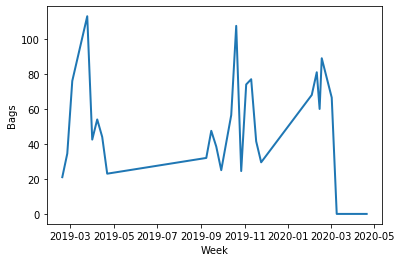

In [998]:
sns.lineplot(weekly['Week'], weekly['Bags'], linewidth=2.0)

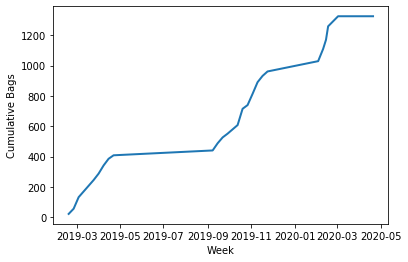

In [999]:
sns.lineplot(weekly['Week'], weekly['Cumulative Bags'], linewidth=2.0)